In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('menu.csv')

In [9]:
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [10]:
for column in df.columns:
    df = df.rename(columns={column : column.replace("(% Daily Value)", "DV")} )
for column in df.columns:
    df = df.rename(columns={column : column.replace(" ", "_")})
    
if 'Serving_Size' in df.columns:
    df['Serving_Size_g'] = None
    for i,value in enumerate(df['Serving_Size']):
        if (value.find('fl') < 0 and value.find('ml') < 0):
            value = (value[value.find("(")+1:value.find(" g")])
            df['Serving_Size_g'][i] = np.float64(value)
            df['Serving_Size'][i] = None
        else:
            if (value.find(' fl') > 0):
                df['Serving_Size'][i] = (np.float64(value[0:value.find(' fl')]) * 29.57)
            elif (value.find(' ml') > 0):
                df['Serving_Size'][i] = np.float64(value[value.find(' ml')-3:value.find(' ml')])

    df = df.rename(columns={"Serving_Size": "Serving_Size_ml"})

    if (df.columns.tolist()[3] != "Serving_Size_g"):
        cols = df.columns.tolist()
        cols = cols[:3] + cols[-1:] + cols[-22:-1]
        df = df[cols]

    df['Serving_Size_g'] = np.float64(df['Serving_Size_g'])
    df['Serving_Size_ml'] = np.float64(df['Serving_Size_ml'])

display(df.dtypes)

Category              object
Item                  object
Serving_Size_ml      float64
Serving_Size_g       float64
Calories               int64
Calories_from_Fat      int64
Total_Fat            float64
Total_Fat_DV           int64
Saturated_Fat        float64
Saturated_Fat_DV       int64
Trans_Fat            float64
Cholesterol            int64
Cholesterol_DV         int64
Sodium                 int64
Sodium_DV              int64
Carbohydrates          int64
Carbohydrates_DV       int64
Dietary_Fiber          int64
Dietary_Fiber_DV       int64
Sugars                 int64
Protein                int64
Vitamin_A_DV           int64
Vitamin_C_DV           int64
Calcium_DV             int64
Iron_DV                int64
dtype: object

In [11]:
df.shape

(260, 25)

In [12]:
df = df[df['Category'].isin(['Snacks & Sides'])]

df.shape

(13, 25)

In [17]:
df

,Category,Item,Serving_Size_ml,Serving_Size_g,Calories,Calories_from_Fat,Total_Fat,Total_Fat_DV,Saturated_Fat,Saturated_Fat_DV,...,Carbohydrates,Carbohydrates_DV,Dietary_Fiber,Dietary_Fiber_DV,Sugars,Protein,Vitamin_A_DV,Vitamin_C_DV,Calcium_DV,Iron_DV
90,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),NaN,130.0,340,130,15.0,23,4.5,22,...,37,12,1,6,8,14,4,0,10,10
91,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),NaN,123.0,260,70,8.0,13,3.5,18,...,30,10,1,6,7,16,4,2,10,10
92,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),NaN,123.0,330,130,15.0,23,4.5,22,...,34,11,1,5,3,14,2,0,10,10
93,Snacks & Sides,Honey Mustard Snack Wrap (Grilled Chicken),NaN,116.0,250,70,8.0,13,3.5,18,...,27,9,1,5,2,16,2,2,10,10
94,Snacks & Sides,Ranch Snack Wrap (Crispy Chicken),NaN,128.0,360,180,20.0,30,5.0,27,...,32,11,1,5,3,15,2,0,10,10
95,Snacks & Sides,Ranch Snack Wrap (Grilled Chicken),NaN,121.0,280,120,13.0,20,4.5,22,...,25,8,1,5,2,16,2,2,10,10
96,Snacks & Sides,Small French Fries,NaN,75.0,230,100,11.0,17,1.5,8,...,30,10,2,10,0,2,0,30,0,4
97,Snacks & Sides,Medium French Fries,NaN,111.0,340,140,16.0,24,2.5,11,...,44,15,4,14,0,4,0,45,2,4
98,Snacks & Sides,Large French Fries,NaN,168.0,510,220,24.0,37,3.5,17,...,67,22,5,22,0,6,0,70,2,8
99,Snacks & Sides,Kids French Fries,NaN,38.0,110,50,5.0,8,1.0,4,...,15,5,1,5,0,1,0,15,0,2


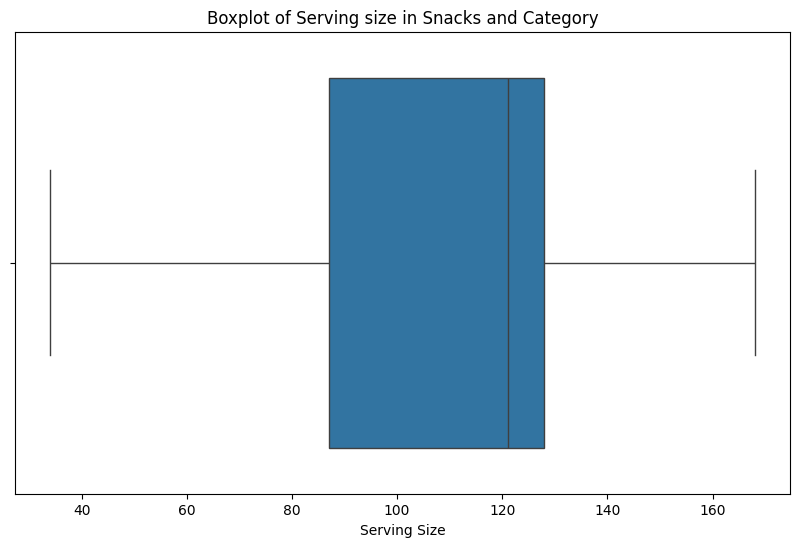

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Serving_Size_g')
plt.title('Boxplot of Serving size in Snacks and Category')
plt.xlabel('Serving Size')
plt.show()

In [20]:
max_calories_index = df['Calories'].idxmax()

item_with_most_calories = df.loc[max_calories_index, 'Item']
max_calories = df.loc[max_calories_index, 'Calories']

print(f"The item with the most calories in the Snacks and Sides category is '{item_with_most_calories}' with {max_calories} calories.")

The item with the most calories in the Snacks and Sides category is 'Large French Fries' with 510 calories.


In [21]:
max_calories_from_fat_index = df['Calories_from_Fat'].idxmax()

item_with_most_calories_from_fat = df.loc[max_calories_from_fat_index, 'Item']
max_calories_from_fat = df.loc[max_calories_from_fat_index, 'Calories_from_Fat']

print(f"The item with the most calories from fat in the Snacks and Sides category is '{item_with_most_calories_from_fat}' with {max_calories_from_fat} calories.")

The item with the most calories from fat in the Snacks and Sides category is 'Large French Fries' with 220 calories.


In [22]:
max_fat_index = df['Total_Fat'].idxmax()

item_with_most_fat = df.loc[max_fat_index, 'Item']
max_fat = df.loc[max_fat_index, 'Total_Fat']

print(f"The item with the most fat in the Snacks and Sides category is '{item_with_most_fat}' with {max_fat} fats.")

The item with the most fat in the Snacks and Sides category is 'Large French Fries' with 24.0 fats.


In [23]:
max_Saturated_Fat_index = df['Saturated_Fat'].idxmax()

item_with_most_Saturated_fat = df.loc[max_Saturated_Fat_index, 'Item']
max_saturated_fat = df.loc[max_Saturated_Fat_index, 'Saturated_Fat']

print(f"The item with the most saturated fat in the Snacks and Sides category is '{item_with_most_Saturated_fat}' with {max_saturated_fat} fats.")

The item with the most saturated fat in the Snacks and Sides category is 'Ranch Snack Wrap (Crispy Chicken)' with 5.0 fats.


In [24]:
max_Cholesterol_index = df['Cholesterol'].idxmax()

item_with_most_Cholesterol = df.loc[max_Cholesterol_index, 'Item']
max_Cholesterol = df.loc[max_Cholesterol_index, 'Cholesterol']

print(f"The item with the most Cholestrol in the Snacks and Sides category is '{item_with_most_Cholesterol}' with {max_Cholesterol} ")

The item with the most Cholestrol in the Snacks and Sides category is 'Honey Mustard Snack Wrap (Grilled Chicken)' with 45 


In [25]:
max_Sodium_index = df['Sodium'].idxmax()

item_with_most_Sodium = df.loc[max_Sodium_index, 'Item']
max_Sodium = df.loc[max_Sodium_index, 'Sodium']

print(f"The item with the most Sodium in the Snacks and Sides category is '{item_with_most_Sodium}' with {max_Sodium} ")

The item with the most Sodium in the Snacks and Sides category is 'Ranch Snack Wrap (Crispy Chicken)' with 810 


In [26]:
max_Carbohydrates_index = df['Carbohydrates'].idxmax()

item_with_most_Carbohydrates = df.loc[max_Carbohydrates_index, 'Item']
max_Carbohydrates = df.loc[max_Carbohydrates_index, 'Carbohydrates']

print(f"The item with the most Carbohydrates in the Snacks and Sides category is '{item_with_most_Carbohydrates}' with {max_Carbohydrates} ")

The item with the most Carbohydrates in the Snacks and Sides category is 'Large French Fries' with 67 


In [27]:
max_Sugars_index = df['Sugars'].idxmax()

item_with_most_Sugars = df.loc[max_Sugars_index, 'Item']
max_Sugars = df.loc[max_Sugars_index, 'Sugars']

print(f"The item with the most Sugars in the Snacks and Sides category is '{item_with_most_Sugars}' with {max_Sugars} ")

The item with the most Sugars in the Snacks and Sides category is 'Fruit 'n Yogurt Parfait' with 23 


In [28]:
max_Protein_index = df['Protein'].idxmax()

item_with_most_Protein = df.loc[max_Protein_index, 'Item']
max_Protein = df.loc[max_Protein_index, 'Protein']

print(f"The item with the most Protein in the Snacks and Sides category is '{item_with_most_Protein}' with {max_Protein} ")

The item with the most Protein in the Snacks and Sides category is 'Chipotle BBQ Snack Wrap (Grilled Chicken)' with 16 


In [29]:
max_Dietary_Fiber_index = df['Dietary_Fiber'].idxmax()

item_with_most_Dietary_Fiber = df.loc[max_Dietary_Fiber_index, 'Item']
max_Dietary_Fiber = df.loc[max_Dietary_Fiber_index, 'Dietary_Fiber']

print(f"The item with the most Dietary Fiber in the Snacks and Sides category is '{item_with_most_Dietary_Fiber}' with {max_Dietary_Fiber} ")

The item with the most Dietary Fiber in the Snacks and Sides category is 'Large French Fries' with 5 
